This notebook presents the content of the SWGDRUG document as three distinct uncertainty budget examples.

***

# Measurement Uncertainty Budget Examples (SWGDRUG SD-3)

This notebook details three examples of uncertainty budget calculations following the principles of the **Guide to the Expression of Uncertainty in Measurement (GUM)**, as outlined in the SWGDRUG Supplemental Document SD-3.

## General GUM Formulas

### Standard Uncertainty ($\boldsymbol{u_i}$)

Individual uncertainty components ($\pm a_i$) are converted to a standard uncertainty ($u_i$) by dividing by a factor based on its probability distribution.

$$u_i = \frac{a_i}{\text{Divisor}}$$

| Distribution Type | Divisor | Use Case |
| :--- | :--- | :--- |
| **Rectangular (Uniform)** | $\sqrt{3} \approx 1.732$ | Instrument resolution, tolerances, etc. |
| **Normal (Gaussian)** | $k$ (Coverage Factor) | Calibration certificates where $U$ is given, or Type A standard deviation. |

### Combined Standard Uncertainty ($\boldsymbol{u_c}$)

For independent components, the combined standard uncertainty is the **Root Sum of Squares (RSS)** of the individual standard uncertainties.

$$u_c = \sqrt{u_1^2 + u_2^2 + \dots + u_n^2} = \sqrt{\sum_{i=1}^{N} u_i^2}$$

### Expanded Uncertainty ($\boldsymbol{U}$)

The final reported uncertainty is the expanded uncertainty, calculated using a coverage factor ($k$), typically $k=2$ for approximately 95% confidence.

$$U = k \cdot u_c$$

---

## Example 1: Mass Measurement Uncertainty Budget

This example calculates the uncertainty associated with weighing a mass ($m$) on an analytical balance, with a target reading of **$0.10000 \text{ g}$**.

### A. Define Parameters

| Source of Uncertainty | Limit ($\boldsymbol{a_i}$) [g] | Divisor | Distribution |
| :--- | :--- | :--- | :--- |
| **Resolution/Readability** | $\pm 0.00005$ | $\sqrt{3}$ | Rectangular |
| **Calibration Certificate** | $\pm 0.00005$ | $k=2$ | Normal |
| **Linearity** | $\pm 0.00010$ | $\sqrt{3}$ | Rectangular |
| **Drift** | $\pm 0.00005$ | $\sqrt{3}$ | Rectangular |



### B. Python Calculation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define limits (a_i) and divisors
a_readability = 0.00005
a_calibration = 0.00005
a_linearity = 0.00010
a_drift = 0.00005

div_readability = np.sqrt(3)
div_calibration = 2.0  # k=2 assumed for normal distribution on certificate
div_linearity = np.sqrt(3)
div_drift = np.sqrt(3)

# 2. Calculate Standard Uncertainty (u_i)
u_readability = a_readability / div_readability
u_calibration = a_calibration / div_calibration
u_linearity = a_linearity / div_linearity
u_drift = a_drift / div_drift

# 3. Calculate Combined Standard Uncertainty (u_c)
u_c_mass = np.sqrt(u_readability**2 + u_calibration**2 + u_linearity**2 + u_drift**2)

# 4. Calculate Expanded Uncertainty (U)
k = 2.0
U_mass = k * u_c_mass

print(f"--- Mass Uncertainty Budget (g) ---")
print(f"Standard Uncertainty from Readability: {u_readability:.7f} g")
print(f"Standard Uncertainty from Calibration: {u_calibration:.7f} g")
print(f"Standard Uncertainty from Linearity:   {u_linearity:.7f} g")
print(f"Standard Uncertainty from Drift:       {u_drift:.7f} g")
print("-" * 40)
print(f"Combined Standard Uncertainty (u_c): {u_c_mass:.7f} g")
print(f"Expanded Uncertainty (U, k={k}):    {U_mass:.7f} g")

--- Mass Uncertainty Budget (g) ---
Standard Uncertainty from Readability: 0.0000289 g
Standard Uncertainty from Calibration: 0.0000250 g
Standard Uncertainty from Linearity:   0.0000577 g
Standard Uncertainty from Drift:       0.0000289 g
----------------------------------------
Combined Standard Uncertainty (u_c): 0.0000750 g
Expanded Uncertainty (U, k=2.0):    0.0001500 g



### C. Uncertainty Budget Graph


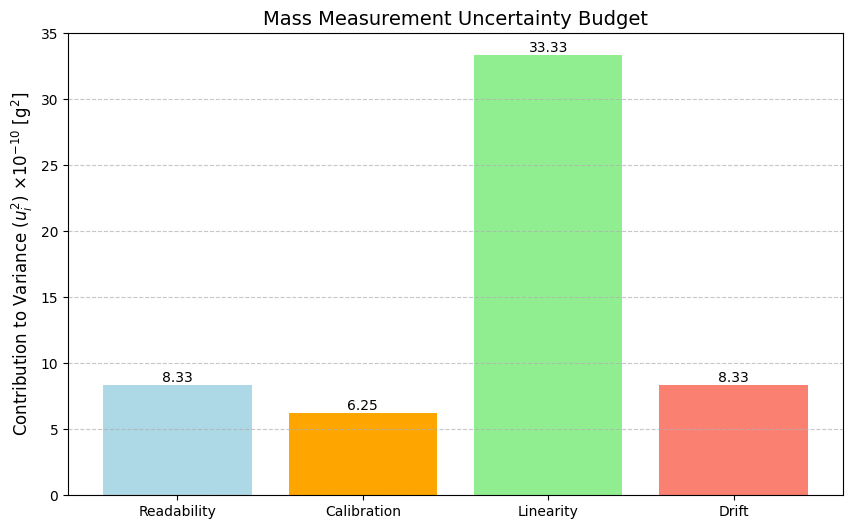

In [2]:
# Create a DataFrame for plotting the budget
mass_data = {
    'Source': ['Readability', 'Calibration', 'Linearity', 'Drift'],
    'u_i': [u_readability, u_calibration, u_linearity, u_drift]
}
df_mass = pd.DataFrame(mass_data)
df_mass['Contribution (u_i^2)'] = df_mass['u_i']**2

# Plotting the contribution (variance)
plt.figure(figsize=(10, 6))
bars = plt.bar(df_mass['Source'], df_mass['Contribution (u_i^2)'] * 1e10, color=['lightblue', 'orange', 'lightgreen', 'salmon'])

plt.ylabel(r'Contribution to Variance ($u_i^2$) $\times 10^{-10}$ [$\mathrm{g}^2$]', fontsize=12)
plt.title('Mass Measurement Uncertainty Budget', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()



---

## Example 2: Volume Measurement Uncertainty Budget

This example calculates the uncertainty associated with the volume ($V$) delivered by a $5 \text{ mL}$ volumetric flask at a target temperature of $20 \text{ °C}$.

### A. Define Parameters

| Source of Uncertainty | Limit ($\boldsymbol{a_i}$) [mL] | Divisor | Distribution | Notes |
| :--- | :--- | :--- | :--- | :--- |
| **Calibration Certificate** | $\pm 0.003$ | $k=2$ | Normal | From certificate's $U$. |
| **Temperature** | $\pm 0.00085$ | $\sqrt{3}$ | Rectangular | Calculated uncertainty due to thermal expansion and $\Delta T$. |

### B. Python Calculation



In [3]:
# 1. Define limits (a_i) and divisors
a_cal_vol = 0.003
a_temp_vol = 0.00085  # This value is based on the final uncertainty of the volume measurement

div_cal_vol = 2.0
div_temp_vol = np.sqrt(3)

# 2. Calculate Standard Uncertainty (u_i)
u_cal_vol = a_cal_vol / div_cal_vol
u_temp_vol = a_temp_vol / div_temp_vol

# 3. Calculate Combined Standard Uncertainty (u_c)
u_c_volume = np.sqrt(u_cal_vol**2 + u_temp_vol**2)

# 4. Calculate Expanded Uncertainty (U)
k = 2.0
U_volume = k * u_c_volume

print(f"--- Volume Uncertainty Budget (mL) ---")
print(f"Standard Uncertainty from Calibration: {u_cal_vol:.7f} mL")
print(f"Standard Uncertainty from Temperature: {u_temp_vol:.7f} mL")
print("-" * 40)
print(f"Combined Standard Uncertainty (u_c): {u_c_volume:.7f} mL")
print(f"Expanded Uncertainty (U, k={k}):    {U_volume:.7f} mL")



--- Volume Uncertainty Budget (mL) ---
Standard Uncertainty from Calibration: 0.0015000 mL
Standard Uncertainty from Temperature: 0.0004907 mL
----------------------------------------
Combined Standard Uncertainty (u_c): 0.0015782 mL
Expanded Uncertainty (U, k=2.0):    0.0031565 mL



### C. Uncertainty Budget Graph



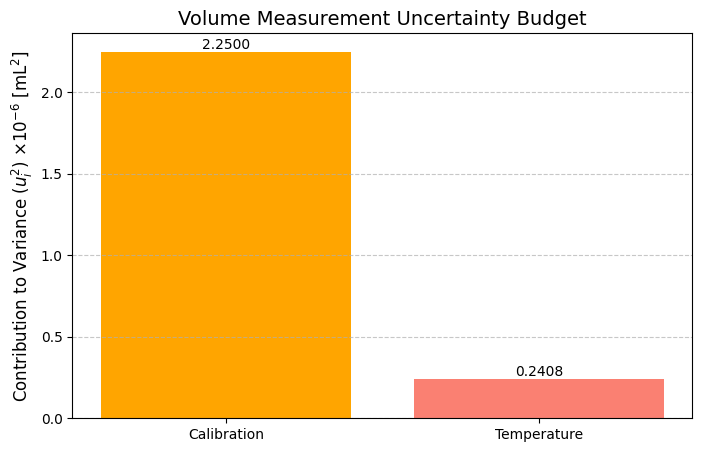

In [4]:

# Create a DataFrame for plotting the budget
volume_data = {
    'Source': ['Calibration', 'Temperature'],
    'u_i': [u_cal_vol, u_temp_vol]
}
df_volume = pd.DataFrame(volume_data)
df_volume['Contribution (u_i^2)'] = df_volume['u_i']**2

# Plotting the contribution (variance)
plt.figure(figsize=(8, 5))
bars = plt.bar(df_volume['Source'], df_volume['Contribution (u_i^2)'] * 1e6, color=['orange', 'salmon'])

plt.ylabel(r'Contribution to Variance ($u_i^2$) $\times 10^{-6}$ [$\mathrm{mL}^2$]', fontsize=12)
plt.title('Volume Measurement Uncertainty Budget', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.0001, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

plt.show()




## Example 3: Concentration of a Standard Solution

This example calculates the uncertainty of the concentration ($C$) of a solution prepared by dissolving the mass ($m$) from Example 1 into the volume ($V$) from Example 2.

The mathematical model for concentration is a quotient:
$$C = \frac{m}{V}$$

For models involving multiplication and division, it is standard practice to calculate the **relative combined standard uncertainty** ($\frac{u_c(C)}{C}$) and then convert back to absolute uncertainty.

### A. Relative Uncertainty Formulas ($\LaTeX$)

The relative combined standard uncertainty is given by the formula:

$$\frac{u_c(C)}{C} = \sqrt{\left(\frac{u(m)}{m}\right)^2 + \left(\frac{u(V)}{V}\right)^2}$$

The absolute combined standard uncertainty is then:
$$u_c(C) = C \cdot \frac{u_c(C)}{C}$$

### B. Define Parameters (from Examples 1 and 2)

*   **Mass ($m$):** $0.10000 \text{ g}$
*   **Standard Uncertainty of Mass ($\boldsymbol{u(m)}$):** $u_{c\_mass} = 0.000085 \text{ g}$ (from Ex 1)
*   **Volume ($V$):** $5.000 \text{ mL}$
*   **Standard Uncertainty of Volume ($\boldsymbol{u(V)}$):** $u_{c\_volume} = 0.001584 \text{ mL}$ (from Ex 2)

### C. Python Calculation


In [5]:
# 1. Define input values and their standard uncertainties
m = 0.10000      # Mass (g)
V = 5.000        # Volume (mL)
u_m = u_c_mass   # Combined standard uncertainty of mass (g)
u_V = u_c_volume # Combined standard uncertainty of volume (mL)

# 2. Calculate the Concentration (C)
C = m / V

# 3. Calculate Relative Standard Uncertainties
rel_u_m = u_m / m
rel_u_V = u_V / V

# 4. Calculate Relative Combined Standard Uncertainty (rel_u_c_C)
rel_u_c_C = np.sqrt(rel_u_m**2 + rel_u_V**2)

# 5. Calculate Absolute Combined Standard Uncertainty (u_c_C)
u_c_C = C * rel_u_c_C

# 6. Calculate Expanded Uncertainty (U_C)
k = 2.0
U_C = k * u_c_C

print(f"--- Concentration Uncertainty Budget (g/mL) ---")
print(f"Concentration (C): {C:.5f} g/mL")
print("-" * 40)
print(f"Relative u(m): {rel_u_m:.5f} (0.0{rel_u_m*100:.3f} %)")
print(f"Relative u(V): {rel_u_V:.5f} (0.0{rel_u_V*100:.3f} %)")
print("-" * 40)
print(f"Relative Combined Standard Uncertainty: {rel_u_c_C:.5f}")
print(f"Absolute Combined Standard Uncertainty (u_c): {u_c_C:.7f} g/mL")
print(f"Expanded Uncertainty (U, k={k}):    {U_C:.7f} g/mL")


--- Concentration Uncertainty Budget (g/mL) ---
Concentration (C): 0.02000 g/mL
----------------------------------------
Relative u(m): 0.00075 (0.00.075 %)
Relative u(V): 0.00032 (0.00.032 %)
----------------------------------------
Relative Combined Standard Uncertainty: 0.00081
Absolute Combined Standard Uncertainty (u_c): 0.0000163 g/mL
Expanded Uncertainty (U, k=2.0):    0.0000325 g/mL



### D. Relative Contribution Graph

This graph shows which input quantity (mass or volume) contributes the most to the overall uncertainty of the concentration.


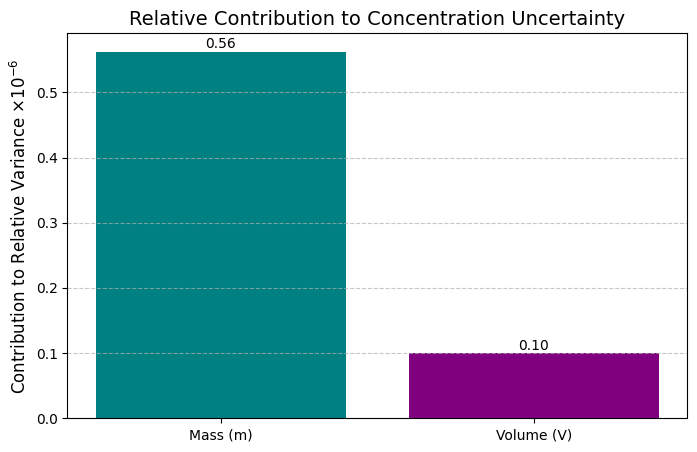

In [6]:
# Create a DataFrame for plotting the relative contribution
concentration_data = {
    'Source': ['Mass (m)', 'Volume (V)'],
    'Relative u_i': [rel_u_m, rel_u_V]
}
df_conc = pd.DataFrame(concentration_data)
df_conc['Contribution to Relative Variance'] = df_conc['Relative u_i']**2

# Plotting the contribution (relative variance)
plt.figure(figsize=(8, 5))
bars = plt.bar(df_conc['Source'], df_conc['Contribution to Relative Variance'] * 1e6, color=['teal', 'purple'])

plt.ylabel(r'Contribution to Relative Variance $\times 10^{-6}$', fontsize=12)
plt.title('Relative Contribution to Concentration Uncertainty', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()